<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Garage3" data-toc-modified-id="Garage3-1">Garage3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-1.1">Standard ICP</a></span></li><li><span><a href="#With-Segmentation" data-toc-modified-id="With-Segmentation-1.2">With Segmentation</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-1.3">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-1" data-toc-modified-id="Rumlang-1-2">Rumlang 1</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-2.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-2.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-2" data-toc-modified-id="Rumlang-2-3">Rumlang 2</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-3.1">Standard ICP</a></span></li><li><span><a href="#Segmentation-from-NYU" data-toc-modified-id="Segmentation-from-NYU-3.2">Segmentation from NYU</a></span></li></ul></li><li><span><a href="#Rumlang-3" data-toc-modified-id="Rumlang-3-4">Rumlang 3</a></span><ul class="toc-item"><li><span><a href="#Standard-ICP" data-toc-modified-id="Standard-ICP-4.1">Standard ICP</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.spatial.transform as stf
import re
import matplotlib.pyplot as plt
%matplotlib inline

# NYU to CLA to Rumlang
## Replay
### Garage 3

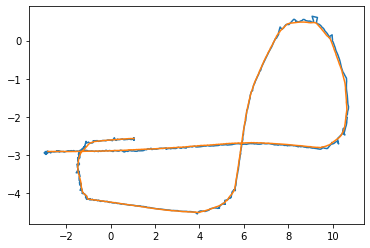

Mean: 0.041, Median: 0.033


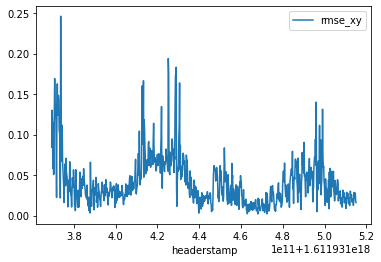

In [2]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclatorumlang_garage3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclatorumlang_garage3_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

### Rumlang 1

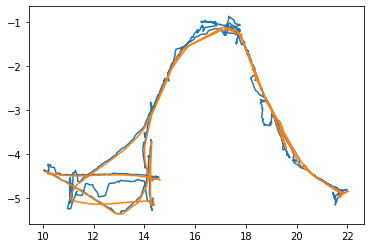

Mean: 0.123, Median: 0.072


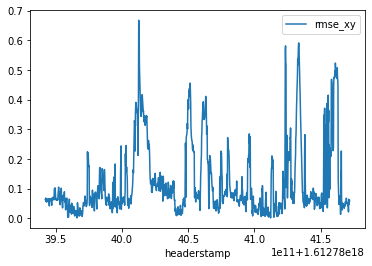

In [3]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclatorumlang_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclatorumlang_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

## Finetune
### Garage 3

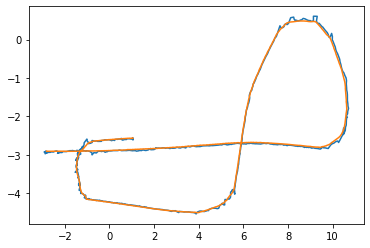

Mean: 0.040, Median: 0.033


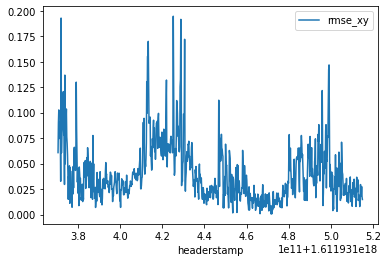

In [4]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclafinetunetorumlangfinetune_garage3_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclafinetunetorumlangfinetune_garage3_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y']
leica['aligned_y'] = leica['trans_x']
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 4.5e8, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))

### Rumlang 1

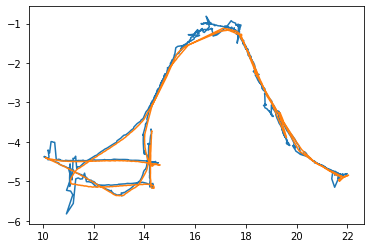

Mean: 0.119, Median: 0.074


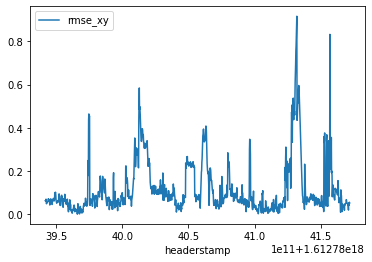

In [5]:
icp = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclafinetunetorumlangfinetune_rumlang1_icp_1.csv')
leica = pd.read_csv('~/asl/rss_2021_data/crossdomain_nyutoclafinetunetorumlangfinetune_rumlang1_leica_1.csv')
# alignment of reference frames
leica['aligned_x'] = -leica['trans_y'] + 17.3084
leica['aligned_y'] = leica['trans_x'] - 6.20957
plt.figure()
plt.plot(icp['trans_x'], icp['trans_y'])
plt.plot(leica['aligned_x'], leica['aligned_y'])
plt.show()
interpolated_gt_x = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_x'],
    bounds_error=False, fill_value=np.nan)
interpolated_gt_y = sp.interpolate.interp1d(
    leica['headerstamp']  + 1.15e9, leica['aligned_y'],
    bounds_error=False, fill_value=np.nan)

icp['gt_trans_x'] = interpolated_gt_x(icp['headerstamp'])
icp['gt_trans_y'] = interpolated_gt_y(icp['headerstamp'])
icp['rmse_xy'] = np.sqrt(
    np.square(icp['trans_x'] - icp['gt_trans_x']) +
    np.square(icp['trans_y'] - icp['gt_trans_y']))
icp.plot('headerstamp', 'rmse_xy')
print('Mean: {:.3f}, Median: {:.3f}'.format(icp['rmse_xy'].mean(), icp['rmse_xy'].median()))